In [11]:
import numpy as np
import pandas as pd
import re
from altair import Chart, load_dataset, X, Y, Color, Axis, Legend, Scale, SortField
from geocodio import GeocodioClient
client = GeocodioClient('0f669aa4d57d7dab0ba9b8dd049a9957678985d')



In [12]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [13]:
#  dtype={'Funding': np.float64},
kyf2 = pd.read_excel('KYF2 new compass data 2015.xls', na_values="No Data",
                     skip_footer=2, encoding='xlrd', parse_dates=['Year'])


In [14]:
kyf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 34 columns):
Title                4185 non-null object
Name                 4185 non-null object
Abbreviati           4185 non-null object
Year                 4185 non-null datetime64[ns]
Address              4185 non-null object
State                4185 non-null object
Town                 4185 non-null object
Zip                  4185 non-null object
Agency               4185 non-null object
Mission_Ar           4185 non-null object
Recipient            4185 non-null object
Recipient_           4185 non-null object
Funding              4176 non-null float64
Funding_Ty           4185 non-null object
Description          4185 non-null object
Topic_A              4185 non-null object
Topic_B              4185 non-null object
Topic_C              4046 non-null object
More_infor           4185 non-null object
X                    4185 non-null float64
Y                    4185 non-null float64


In [25]:
counts = kyf2.describe().iloc[0:1,3:]
counts[counts.columns] = counts[counts.columns].astype(int)
count_df = counts.T.sort_values('count')
count_df.reset_index(inplace=True)
count_df



,index,count
0,Bees,18
1,Soilless,21
2,Blueberries,27
3,Heritage,31
4,Beef,67
5,Logo/Branding,75
6,Tourism,82
7,Food Deserts,85
8,Alcohol,112
9,Beginning Farmers,129


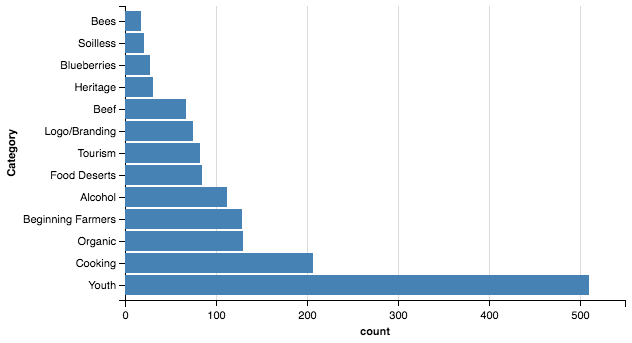

In [27]:
Chart(count_df).mark_bar().encode(y=Y('index', sort=SortField(field='count', order='ascending', op='sum'),
        axis=Axis(title='Category')), x='count')
   


In [ ]:
# convert categories to boolean values
bool_columns = ['Cooking','Tourism','Food Deserts','Beef','Alcohol','Bees','Youth',
                'Beginning Farmers','Organic','Blueberries', 'Heritage','Soilless','Logo/Branding']
kyf2[bool_columns] = kyf2[bool_columns].fillna(value=0)
kyf2[bool_columns] = kyf2[bool_columns].astype(int)


In [ ]:

# # load data as a pandas DataFrame
# cars = load_dataset('cars')

# Chart(cars).mark_point().encode(
#     x='Horsepower',
#     y='Miles_per_Gallon',
#     color='Origin',
# )


In [ ]:
Chart(count_df).mark_bar().encode(y='index', x='count')


In [ ]:
kyf2.head(12)

Grants vs. Loans

In [ ]:
# create a new column that normalizes the funding type

# this regular expression finds "Grant", "grant" and "Grants"
grantre = re.compile('grant.?', re.IGNORECASE)
# np.where(re.match(grantre, kyf2.Funding_Ty))
# kyf2.Funding_Ty.to_replace(grantre, "Grant")


kyf2['grant'] = np.where(kyf2.Funding_Ty.str.contains(grantre), 1,0)
print "Grants: ", sum(kyf2['grant'])
kyf2['loan'] = np.where(kyf2.Funding_Ty.str.contains('Loan'), 1,0)
print "Loans: ", sum(kyf2['loan'])
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains(grantre), "Grant","")
kyf2['grant_loan'] = np.where(kyf2.Funding_Ty.str.contains("Loan"), "Loan",kyf2['grant_loan'])
kyf2['grant_loan'].value_counts(dropna=False)
kyf2[['Funding_Ty','grant_loan']].sample(20).head(20)

In [ ]:
funding_bar_data = kyf2[['Funding','Year', 'grant_loan']].copy()

# pd.set_option('display.float_format', lambda x: '$%.0f' % x)
pd.options.display.float_format = '${:,.0f}'.format
print funding_bar_data.groupby(['Year','grant_loan']).sum()

In [ ]:
pd.options.display.float_format = None

In [ ]:
grants_chart = Chart(funding_bar_data).mark_bar( barSize=25).encode(
    color=Color('grant_loan',
        legend=Legend(
            title='Legend',
        ),
        scale=Scale(
            domain=['Loan', 'Grant'],
            range=['salmon', '#1f77b4'],
        )
    ),
    x=X('Year:T',
        axis=Axis(
            title='Year',
        ),
        timeUnit='year',
    ),
    y='sum(Funding):Q',
).configure_cell(
    height=200,
    width=330
).configure_scale(bandSize=500)

In [ ]:
grants_chart

In [ ]:
! pip freeze | grep -E "notebook|geo|altair"
# ! pip freeze | grep 'pandas'


In [ ]:
df = load_dataset('seattle-weather')
Chart(df).mark_bar().encode(
    X('precipitation', bin=True),
    Y('count(*):Q')
)

In [ ]:
# rename columns
kyf2.rename(columns={'X': 'lon', 'Y':'lat'}, inplace=True)
# kyf2.reset_index(inplace=True)
# kyf_for_geocodio = kyf2[['index',  'lat', 'lon', 'Address', 'State', 'Town', 'Zip']]
# kyf_for_geocodio.to_csv('kyf2latlon1.csv', encoding='utf-8')


In [ ]:
kyf2.head(2)

In [ ]:
# determine if Funding row has null values
# np.where(pd.isnull(kyf2.Funding))
# kyf2['Funding'].hasnans
# nan_rows = kyf2[kyf2.Funding.isnull()]
# nanFunding_rows = kyf2.Funding.dropna(axis=0, inplace=True)
# nanFunding_rows
# print kyf2.sample(6).iloc[:, 10:-10:].head(12)

# kyf2 = kyf2[pd.notnull(kyf2['Funding'])]
# pd.notnull(kyf2['Funding'])
# Drop the nine records with no data for Funding
kyf2 = kyf2.dropna(subset=['Funding'])


In [ ]:
print '--- Count by Year ---'
print kyf2.Year.value_counts().sort_index()
print '--- Count by Funding_Ty value ---'
print kyf2.Funding_Ty.value_counts().sort_index()
print '--- Column list ---'
print kyf2.columns


In [ ]:
# create a file of all the awardees that were not geocoded
lon_zero = kyf2[kyf2['lon']==0.0]
lon_zero.to_csv('lon_zero.csv', encoding='utf-8')

In [ ]:
# import the dataset of ungeocoded records
lon_zero4geocoding = pd.read_csv('lon_zero.csv', encoding='utf-8')
lon_zero4geocoding['Zip'] = lon_zero4geocoding.Zip.astype(str)
lon_zero4geocoding

In [ ]:
address_cols = ['Unnamed: 0','Address','Town','State','Zip']
df = lon_zero4geocoding[address_cols]
# df.reset_index(inplace=True)
df['full_address'] =  df['Address'] \
+", " + df['Town'] + ", " \
+ df['State'] + " " \
+ df['Zip']

#extract for list of index numbers for geocoding
lon_zero_list = df.iloc[:, -1].tolist()
lon_zero_list
# geocode the awardees that had a longitude of 0
# geocoded = client.geocode(lon_zero_list)
df


In [ ]:
# create a DataFrame of latitudes and longitudes
# in the same order as the original extracted list
# awardee_geocodes = {}
# counter = 0
# for awardee in geocoded:
#     awardee_geocodes[counter] = {}

#     results = awardee.values()[1][0]
#     latitude = results['location']['lat']
#     longitude = results['location']['lng']
#     awardee_geocodes[counter]['latitude'] = latitude
#     awardee_geocodes[counter]['longitude'] = longitude
#     counter +=1
# awardee_geocodes
# awardee_geocodes_df = pd.DataFrame(awardee_geocodes).T
# awardee_geocodes_df

geocoded['coords']=tuple(zip(geocoded.latitude, geocoded.longitude))
sample_loclist = geocoded['coords'].tolist()
sample_loclist

In [ ]:
#append the latitude and longitude to the previously ungeocoded addresses
joined_geo_df = df.join(awardee_geocodes_df)
joined_geo_df.set_index('Unnamed: 0', inplace=True)
joined_geo_df

In [ ]:
# create a list of indeces for updating
to_update_list = list(joined_geo_df.index.values)
to_update_list

In [ ]:
for idx in to_update_list:
    kyf2.loc[idx, 'lat'] = joined_geo_df.loc[idx, 'latitude']
    kyf2.loc[idx, 'lon'] = joined_geo_df.loc[idx, 'longitude']


In [ ]:
lon_zero = kyf2[kyf2['lon']==0.0]
print lon_zero[8:-12]
kyf2[8:-12].head()

In [ ]:
# display first 3 records, not including the last 16 columns
# print kyf2.sample(6).iloc[:, 12::].head(12)
# kyf2.iloc[1014:, 10:-3:].head(4)
kyf2.iloc[1474:, 2:-13:].head(2)

In [ ]:
kyf2.dtypes

In [ ]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '${:,.2f}'.format
print pd.DataFrame(kyf2.groupby(['grant_loan']).Funding.mean()) \
.join(pd.DataFrame(kyf2.grant_loan.value_counts()))

In [ ]:
pd.options.display.float_format = None

In [ ]:
print matplotlib.__version__
pair_data_cols = ['Funding', 'lat', 'lon','grant','loan','Year']
kyf2_nums = kyf2[pair_data_cols]
# sns.pairplot(kyf2.iloc[:, :-14:], hue='grant_loan')

sns.pairplot(kyf2_nums, hue='grant')
# kyf2_nums

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
# 'en_US'
locale.format("%d", 1255000, grouping=True)
# '1,255,000'

In [ ]:
# # sns.plt.ticklabel_format(style='plain', axis='both',useOffset=False)
# from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# # ax = plt.gca()
# fig, ax = plt.subplots(1, 1)

# # ax.xaxis.set_major_formatter(FormatStrFormatter('$%0.2f'))
# fmt = '${x:,.0f}'
# # tick = StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(fmt)


from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('${x:,.0f}'))
sns.distplot(kyf2['Funding'], kde=False, bins =100)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.DataFrame({'A': ['A', 'B'], 'B': [1000,2000]})

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
df.plot(kind='bar', x='A', y='B',
        align='center', width=.5, edgecolor='none', 
        color='grey', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=25)

plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

In [ ]:
corr = kyf2.corr()
sns.heatmap(corr, linewidths= 0.25)

In [ ]:
locations = kyf2[['lat', 'lon']].sample(60).head(100)
locationlist = locations.values.tolist()
print locations

In [ ]:
locations['coords']=tuple(zip(locations.lat, locations.lon))
loclist = locations['coords'].tolist()
# coordscol = locations['coords']
# coordscol.tolist
loclist

In [ ]:
locations['coords']

In [ ]:
# Get two sample geocodes from each state
each_state = kyf2.groupby('State').head(2).loc[:, ["lat", 'lon']]
# sample_geo_2 = sample_geo.reset_index()

each_state['coords']=tuple(zip(each_state.lat, each_state.lon))
each_state_list = each_state['coords'].tolist()
each_state_list

# counter = 0
# geo_dict = {}
# for sampleloc in sample_geo_2:
#     geo_dict[counter] = {}
# #     geo_dict[counter]['latitude'] = sampleloc['latitude']
# #     geo_dict[counter]['longitude'] = sampleloc['longitude']
#     counter+=1
#     print sampleloc
# print geo_dict

In [ ]:
sample_states_geo = client.reverse(each_state, fields=['cd', 'stateleg', 'census'])
sample_states_geo.formatted_addresses


In [ ]:
samplegeo

In [ ]:
kyfgeo = client.reverse(loclist, fields=["cd", "stateleg", 'census'])
# kyfgeo.get('32.372458,-81.557286')
type(kyfgeo)
df_addresses = pd.DataFrame(kyfgeo.formatted_addresses)
df_addresses

In [ ]:
details = {}
counter = 0
for loc in kyfgeo:
    details[counter] = {}

    results = loc.values()[0][0]
    fields = results['fields']
    census= fields['census']    
    
    census_year = census['census_year']
    state_fips = census['state_fips']
    county_fips = census['county_fips']
    place_fips = census['place_fips']
    tract_code = census['tract_code']
    block_code = census['block_code']
    block_group = census['block_group']
    
    accuracy = results['accuracy']
    accuracy_type = results['accuracy_type']
    details[counter]['census_year'] = census_year
    details[counter]['state_fips'] = state_fips
    details[counter]['county_fips'] = county_fips
    details[counter]['place_fips'] = place_fips
    details[counter]['tract_code'] = tract_code
    details[counter]['census_year'] = block_group
    details[counter]['accuracy'] = accuracy
    details[counter]['accuracy_type'] = accuracy_type
    details[counter]['source'] = source    
    if loc.formatted_address[-8:-6] == 'DC':
        print "in DC"
        counter += 1
    if loc.formatted_address[-8:-6] == 'AS':
        print "in AS"
        flds = loc.values()[0][0]['fields']    
        cd=flds['congressional_district']['district_number']
        details[counter] = {}
        details[counter]['cd'] = cd
        counter += 1
    else:
        components = results['address_components']
        state = components['state']
        county = components['county']
        cd = fields['congressional_district']['district_number']
        sl = fields['state_legislative_districts']['house']['district_number']
        su = fields['state_legislative_districts']['senate']['district_number']

        source = results['source']
        details[counter]['state'] = state
        details[counter]['cd'] = cd
        details[counter]['sl'] = sl
        details[counter]['su'] = su
        details[counter]['county'] = county



        counter += 1
print details


# su = fields['state_legislative_districts']['senate']['district_number']
# sl = fields['state_legislative_districts']['house']['district_number']
# su_name = fields['state_legislative_districts']['senate']['name']
# sl_name = fields['state_legislative_districts']['house']['name']

# cty = results['address_components']['county']
# state = results['address_components']['state']




In [ ]:
# pr_location = client.reverse((-66.405977,18.454233), fields=["cd", "stateleg", "census"])
as_location = client.reverse((-14.278056,-170.7025), fields=["cd", "stateleg", "census"])
as_location

In [ ]:
fields = locations.values()[1][0]['fields']
cd = fields['congressional_district']['district_number']
sl = fields['state_legislative_districts']['house']['district_number']
su = fields['state_legislative_districts']['senate']['district_number']
type(fields)


locations.get('38.879138,-76.98187')[0]['congressional_district']

In [ ]:
geocoded_addresses[0]['results'][0]['location']

In [ ]:
sample_locations1 = client.reverse([
        (33.738987, -116.4083),
        (33.738987, -106.4083),
        (38.879138, -76.98187)
    ],  fields=["cd", "stateleg"])
sample_locations.lookups

In [ ]:
sample_locations.get((38.879138,-76.98187))

In [ ]:
sample_locations.formatted_addresses

In [ ]:
sample_locations

In [ ]:
# locations.get('')
sample_locations.get('results')

In [ ]:
'''
{
'4324': '(37.3256, -105.63459),
'4356': {'lat': 0, 'lon': 180, 'district': 4}
}
'''

In [ ]:
# withdistricts= client.geocode("3443 Guilford Terrace, Baltimore, MD 21218", fields=['cd', 'stateleg','census'])
# withdistricts= client.geocode("Pago Pago, AS 96799", fields=['cd', 'stateleg','census'])
withdistricts = client.reverse((-14.278056,-170.7025), fields=["cd", "stateleg", "census"])

# geo2.lookups
results = withdistricts.values()[0][0]
fields = results['fields']
census= fields['census']
cd = fields['congressional_district']['district_number']
# su = fields['state_legislative_districts']['senate']['district_number']
# sl = fields['state_legislative_districts']['house']['district_number']
# su_name = fields['state_legislative_districts']['senate']['name']
# sl_name = fields['state_legislative_districts']['house']['name']
cty = results['address_components']['county']
state = results['address_components']['state']
accuracy = results['accuracy']
accuracy_type = results['accuracy_type']
source = results['source']
census_year = census['census_year']
state_fips = census['state_fips']
county_fips = census['county_fips']
place_fips = census['place_fips']
tract_code = census['tract_code']
block_code = census['block_code']
block_group = census['block_group']

# withdistricts.accuracy
# withdistricts.values()
# # withdistricts.fields
withdistricts.values()
# print cd, su, sl, su_name, sl_name, cty, state, accuracy, accuracy_type, source, census_year,state_fips,county_fips,place_fips,tract_code,block_code,block_group
print cd, cty, state, accuracy, accuracy_type, source, census_year,state_fips,county_fips,place_fips,tract_code,block_code,block_group



In [ ]:
Chart(funding_bar_data).mark_bar().encode(
    X('Year:T', timeUnit='year'),
#     Y('Funding:Q', aggregate='sum'),
    y='sum(Funding):Q',
#     Color('grant_loan')
    color='grant_loan:N',
)

In [ ]:
Chart(kyf2).mark_bar().encode(
    x=X('Year:T', timeUnit='year'),
    y='count(*)',
    color='grant_loan',
)

In [ ]:
axis('equal');
pie(counts, labels=counts.index);
show()